In [1]:
import pandas as pd
import os
from datetime import datetime, date 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/gwynethvolkmann/Desktop/datascience'
os.chdir(path)

In [3]:
df = pd.read_csv('hybrid_vehicle_price_data.csv')
df.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
1,2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
2,3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
3,4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
4,5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carid        153 non-null    int64  
 1   vehicle      153 non-null    object 
 2   year         153 non-null    int64  
 3   msrp         153 non-null    float64
 4   accelrate    153 non-null    float64
 5   mpg          153 non-null    float64
 6   mpgmpge      153 non-null    float64
 7   carclass     153 non-null    object 
 8   carclass_id  153 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.9+ KB


In [5]:
df.describe()

,carid,year,msrp,accelrate,mpg,mpgmpge,carclass_id
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.117647,2009.718954,39319.434706,11.958497,34.797451,38.453268,3.607843
std,44.492599,3.459270,21421.126089,2.940225,10.972522,18.363146,1.964271
min,1.000000,1997.000000,11849.430000,6.290000,17.000000,17.000000,1.000000
25%,39.000000,2008.000000,24995.000000,9.520000,26.000000,26.000000,2.000000
50%,77.000000,2011.000000,31950.000000,11.630000,33.000000,33.640000,3.000000
75%,115.000000,2013.000000,49650.000000,13.470000,41.260000,43.000000,6.000000
max,154.000000,2013.000000,118543.600000,20.410000,72.920000,100.000000,7.000000


In [6]:
df = df.set_index('carid')
df.head()

,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
carid,,,,,,,,
1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1


In [7]:
df['vehicle'].value_counts()

Insight             10
Silverado 15 2WD     5
ActiveHybrid 5       3
MKZ FWD              3
Sonata               3
                    ..
Auris HSD            1
Optima EX            1
Escalade 2WD         1
Camry LXLE           1
C-Max FWD            1
Name: vehicle, Length: 109, dtype: int64

In [8]:
df['vehicle'].unique()

array(['Prius (1st Gen)', 'Tino', 'Prius (2nd Gen)', 'Insight',
       'Civic (1st Gen)', 'Alphard', 'Civic', 'Escape', 'Prius',
       'Silverado 15 2WD', 'Lexus RX400h', 'Civic (2nd Gen)',
       'Highlander', 'Escape 2WD', 'Accord', 'Mercury Mariner', 'Camry',
       'Lexus GS450h', 'Estima', 'Altima', 'Chevrolet Tahoe', 'Kluger',
       'Lexus LS600h/hL', 'Tribute', 'GMC Yukon', 'Aura', 'Vue', 'Crown',
       'Cadillac Escalade', 'F3DM', 'A5 BSG', 'Lexus RX450h',
       'ML450 Blue HV', 'Prius (3rd Gen)', 'S400 Long', 'Mercury Milan',
       'Lexus HS250h', 'Avante/Elantra LPI', 'ActiveHybrid X6', 'SAI',
       'Malibu', 'Aspen HEV', 'Durango', 'Auris HSD', 'CR-Z', 'F3DM PHEV',
       'Touareg', 'Audi Q5', 'Jeep Patriot', 'Besturn B50  ',
       'ActiveHybrid 7', 'Lincoln MKZ', 'Fit/Jazz', 'Sonata', 'Cayenne S',
       'Fuga Infiniti M35H', 'Chevrolet Volt', 'Tribute 4WD',
       'Fusion FWD', 'HS 250h', 'Mariner FWD', 'RX 450h', 'ML450 4natic',
       'S400', 'Aqua', 'Lexus CT200h

In [9]:
df['year'].value_counts()

2013    43
2010    23
2011    20
2012    14
2009    14
2007     8
2005     8
2006     5
2008     4
2004     4
2003     3
2000     3
2001     2
2002     1
1997     1
Name: year, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'msrp'}>],
       [<AxesSubplot:title={'center':'accelrate'}>,
        <AxesSubplot:title={'center':'mpg'}>],
       [<AxesSubplot:title={'center':'mpgmpge'}>,
        <AxesSubplot:title={'center':'carclass_id'}>]], dtype=object)

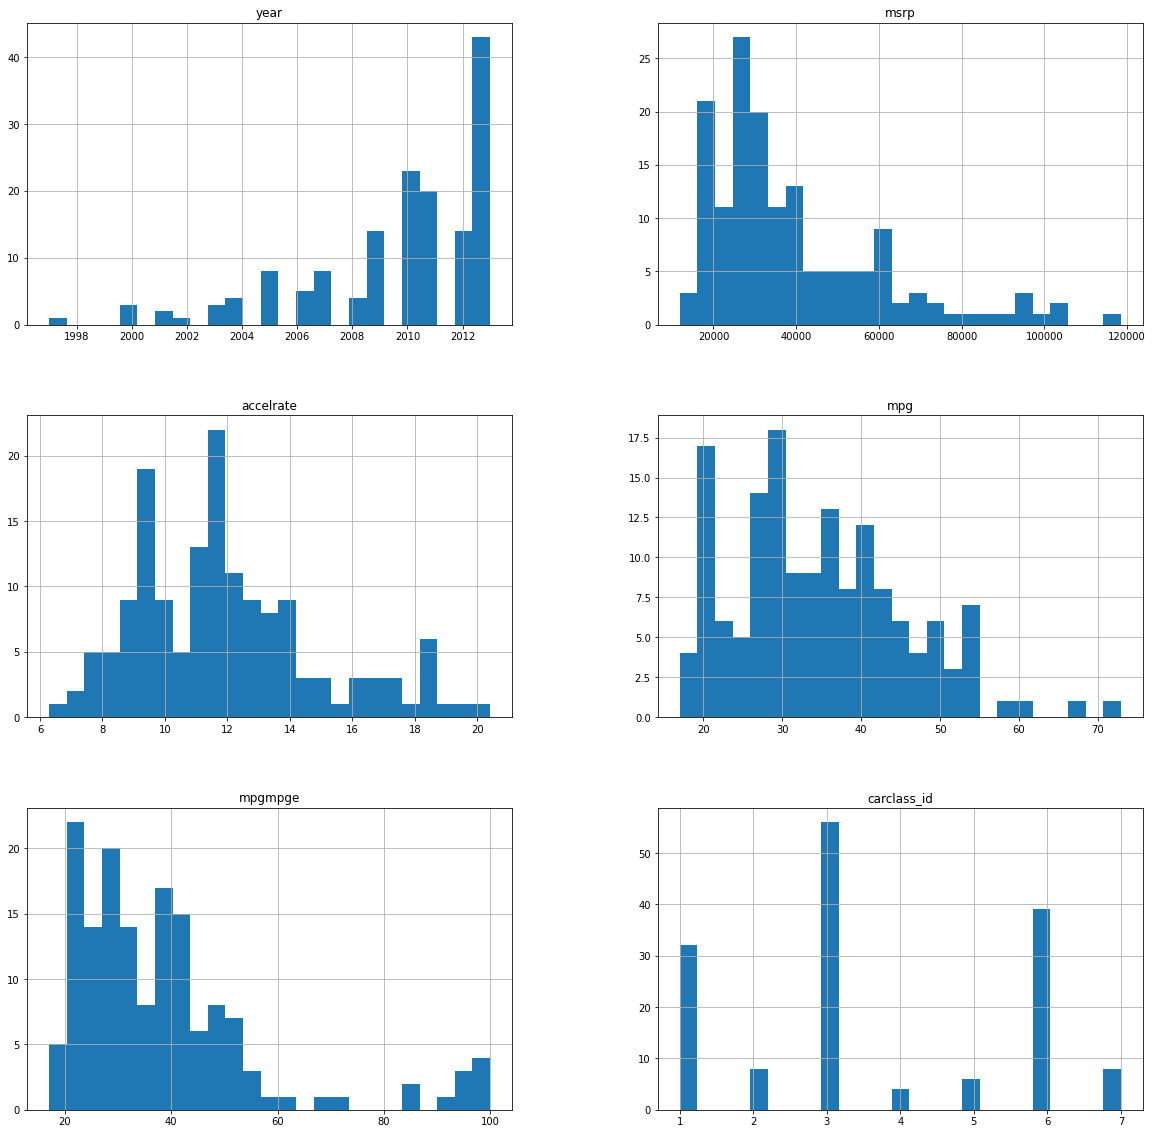

In [10]:
df.hist(bins=25, figsize=(20,20))

<AxesSubplot:>

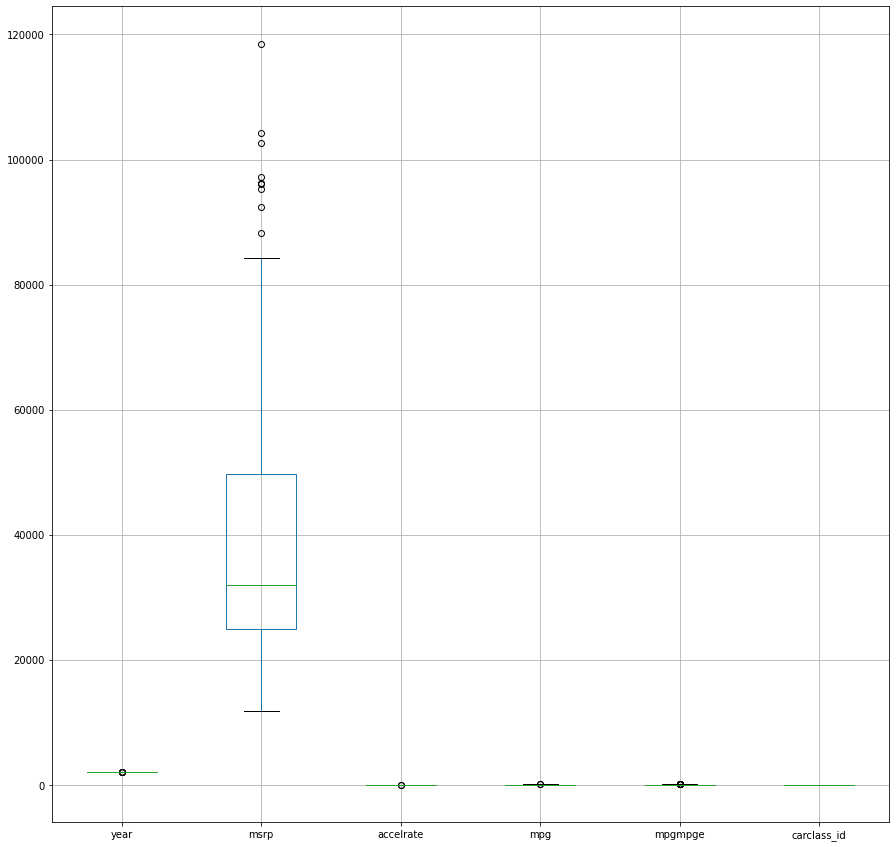

In [11]:
df.boxplot(figsize=(15, 15))

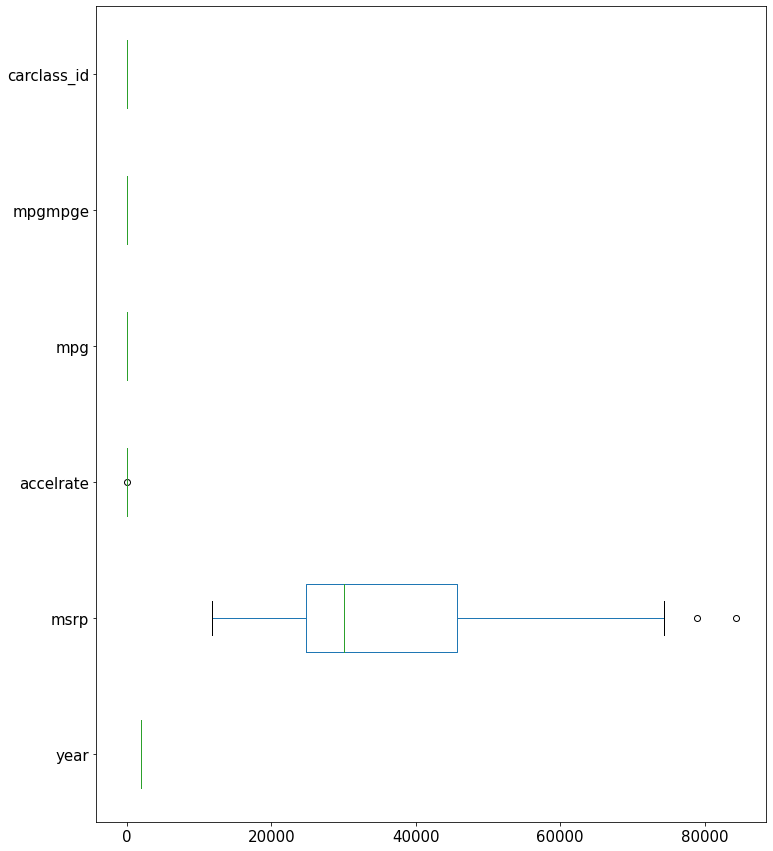

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
dfno = df[~((df<(Q1 -1.5 *IQR)) | (df > (Q3 +1.5*IQR))).any(axis=1)]
dfboxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [13]:
df.shape

(153, 8)

In [14]:
dfno.shape

(127, 8)

In [15]:
corr = dfno.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,year,msrp,accelrate,mpg,mpgmpge,carclass_id
year,1.000000,0.240000,0.350000,-0.140000,-0.140000,-0.240000
msrp,0.240000,1.000000,0.630000,-0.530000,-0.540000,0.290000
accelrate,0.350000,0.630000,1.000000,-0.430000,-0.430000,0.170000
mpg,-0.140000,-0.530000,-0.430000,1.000000,1.000000,-0.440000
mpgmpge,-0.140000,-0.540000,-0.430000,1.000000,1.000000,-0.430000
carclass_id,-0.240000,0.290000,0.170000,-0.440000,-0.430000,1.000000


In [16]:
dfno.head()

,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
carid,,,,,,,,
5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1
6,Insight,2001,19036.71,9.52,53.00,53.00,TS,7
7,Insight,2002,19137.01,9.71,53.00,53.00,TS,7
8,Alphard,2003,38084.77,8.33,40.46,40.46,MV,4
9,Insight,2003,19137.01,9.52,53.00,53.00,TS,7


In [17]:
dfno['carclass'].value_counts()

M      46
SUV    38
C      24
TS      7
PT      6
MV      4
L       2
Name: carclass, dtype: int64

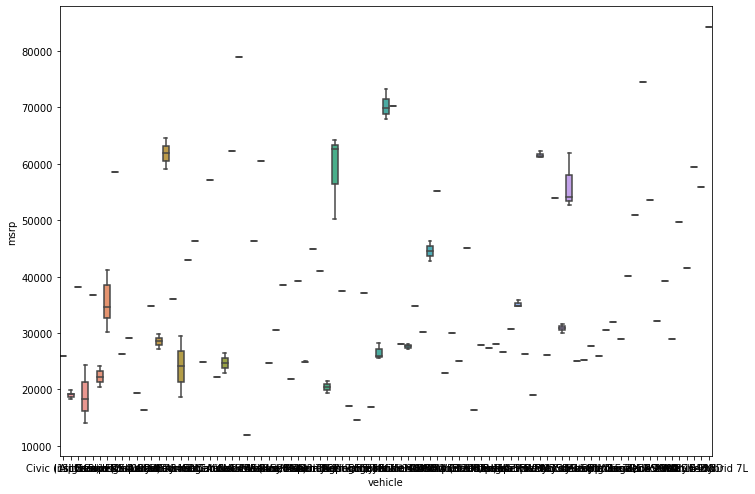

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="vehicle", y="msrp", ax=ax, data=dfno)

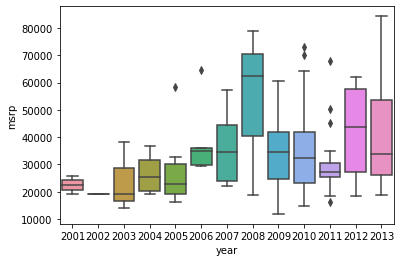

In [19]:
ax = sns.boxplot(x="year", y="msrp", data=dfno)

<AxesSubplot:xlabel='accelrate', ylabel='msrp'>

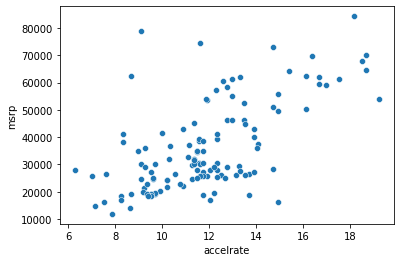

In [20]:
sns.scatterplot(data=dfno, x="accelrate", y="msrp")

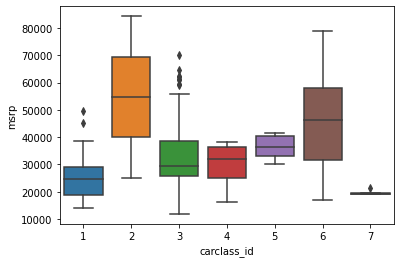

In [21]:
ax = sns.boxplot(x="carclass_id", y="msrp", data=dfno)

In [22]:
dfno.drop(columns=['vehicle','mpgmpge','carclass_id'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
carclass_dummy = pd.get_dummies(dfno['carclass'])
dfno = pd.concat([dfno,carclass_dummy], axis=1)
dfno.drop(['carclass'], axis=1, inplace=True)
dfno.head()

,year,msrp,accelrate,mpg,C,L,M,MV,PT,SUV,TS
carid,,,,,,,,,,,
5,2001,25833.38,7.04,47.04,1,0,0,0,0,0,0
6,2001,19036.71,9.52,53.00,0,0,0,0,0,0,1
7,2002,19137.01,9.71,53.00,0,0,0,0,0,0,1
8,2003,38084.77,8.33,40.46,0,0,0,1,0,0,0
9,2003,19137.01,9.52,53.00,0,0,0,0,0,0,1


Since carclass is now represented by the one-hot encoded variable, I decided to drop carclassid, since this variable does not actually indicate weight and since it is numerically represented this has the potential to complicate the results of the model. I am also removing mpgmpge since this variable has a very high correlation with the mpg variable and this will remove any signal in the model that can be attributed to multicollinearity. I am also removing the vehicle variable since there are 109 different types of vehicles for 153 data points, so including this metric might result in overfitting of the data since many data points for the vehicle variable are the only one for that particular type. 

In [24]:
dfno.to_csv('car_no.csv')